In this project,we will make predictions about selling price of a used car with the help of dataset obtained from Kaggle.The dataset was scraped from cardekho.com.We will start by loading the dataset.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df=pd.read_csv('Car Dataset.csv')

In [3]:
df.shape

(4340, 8)

In [4]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


From the info() method we can see the columns of the dataframe and dtype along with non null count.Selling_price is the target column.We can do some feature engineering on rest of the columns.

# Feature Engineering

In [6]:
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

While determining the selling price of the car,the age of the model will play an important role.By age I mean how old the car is.So,we can create a derived feature by subtracting the present year(2020) with the year column of the dataset.

In [7]:
df['Present Year']=2020
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,Present Year
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,2020
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,2020
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,2020
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,2020
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,2020


In [8]:
df['years_old']=df['Present Year'] - df['year']
df=df.drop(columns=['year','Present Year'],axis=1)
df.head()

,name,selling_price,km_driven,fuel,seller_type,transmission,owner,years_old
0,Maruti 800 AC,60000,70000,Petrol,Individual,Manual,First Owner,13
1,Maruti Wagon R LXI Minor,135000,50000,Petrol,Individual,Manual,First Owner,13
2,Hyundai Verna 1.6 SX,600000,100000,Diesel,Individual,Manual,First Owner,8
3,Datsun RediGO T Option,250000,46000,Petrol,Individual,Manual,First Owner,3
4,Honda Amaze VX i-DTEC,450000,141000,Diesel,Individual,Manual,Second Owner,6


Now,we can see from the dataset that the columns seeler type,transmission,owner,fuel are categorical features.So,we will convert them into numbers so that the model can make sense of the features.

In [9]:
df.drop(columns=['name'],inplace=True)
df.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,years_old
0,60000,70000,Petrol,Individual,Manual,First Owner,13
1,135000,50000,Petrol,Individual,Manual,First Owner,13
2,600000,100000,Diesel,Individual,Manual,First Owner,8
3,250000,46000,Petrol,Individual,Manual,First Owner,3
4,450000,141000,Diesel,Individual,Manual,Second Owner,6


In [10]:
df=pd.get_dummies(df,drop_first=True)
df.head()

,selling_price,km_driven,years_old,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,60000,70000,13,0,0,0,1,1,0,1,0,0,0,0
1,135000,50000,13,0,0,0,1,1,0,1,0,0,0,0
2,600000,100000,8,1,0,0,0,1,0,1,0,0,0,0
3,250000,46000,3,0,0,0,1,1,0,1,0,0,0,0
4,450000,141000,6,1,0,0,0,1,0,1,0,1,0,0


In [11]:
df.shape

(4340, 14)

Now,lets check correlations between different columns and our target column.Correlations between variables are important for any type of prediction model.

In [12]:
import seaborn as sns

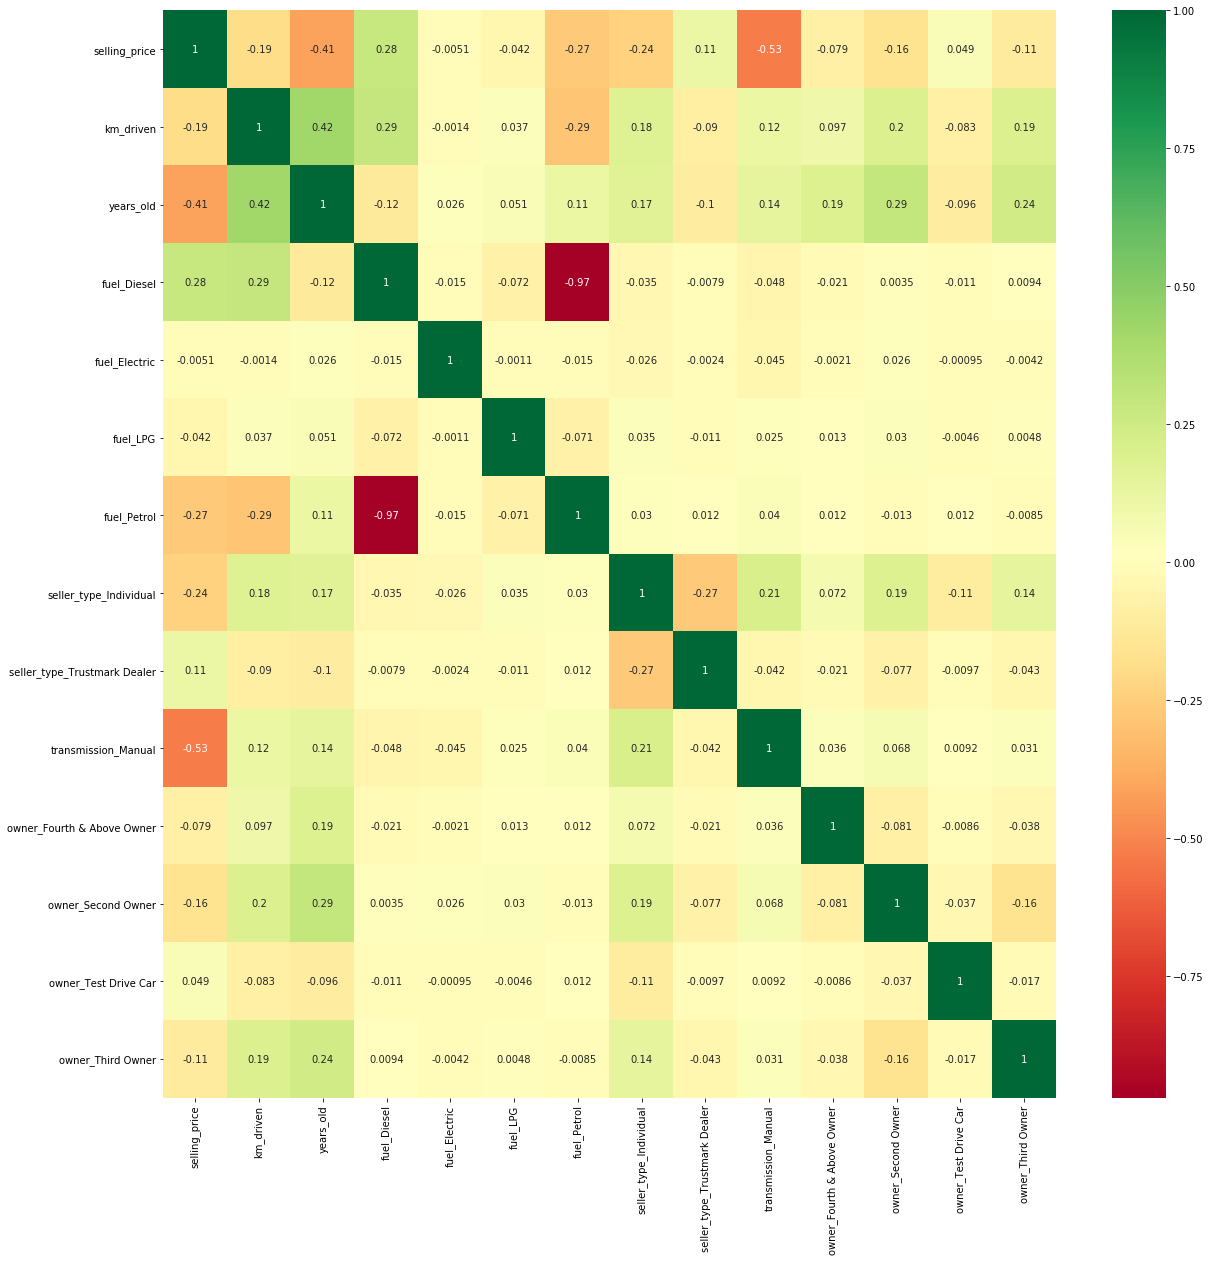

In [13]:
%matplotlib inline
cormat=df.corr()
top_cor=cormat.index
plt.figure(figsize=(20,20))
heat=sns.heatmap(df[top_cor].corr(),annot=True,cmap="RdYlGn")
heat

In [14]:
X=df.iloc[:,1:]
y=df.iloc[:,0]

In [15]:
X.head()

,km_driven,years_old,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,70000,13,0,0,0,1,1,0,1,0,0,0,0
1,50000,13,0,0,0,1,1,0,1,0,0,0,0
2,100000,8,1,0,0,0,1,0,1,0,0,0,0
3,46000,3,0,0,0,1,1,0,1,0,0,0,0
4,141000,6,1,0,0,0,1,0,1,0,1,0,0


In [16]:
y.head()

0     60000
1    135000
2    600000
3    250000
4    450000
Name: selling_price, dtype: int64

In [17]:
#Feature importance
from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [18]:
print(model.feature_importances_)

[2.43577600e-01 2.49280473e-01 1.30314513e-01 4.89011734e-05
 2.43592486e-05 1.88931713e-04 4.65600829e-02 8.63619600e-03
 2.92827994e-01 7.85771252e-04 2.22017897e-02 1.35062684e-03
 4.20276118e-03]


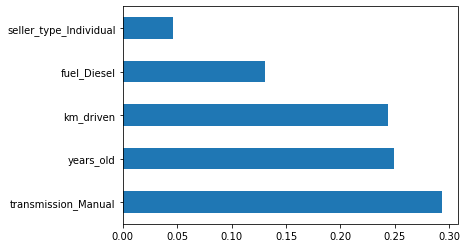

In [19]:
feat_importances=pd.Series(model.feature_importances_,index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

As we can see from the feature importance graph,transmission of the type manual seems to be highly correlated with the selling price.Then we have km_driven and years_old(as we saw earlier that years_old was going to play an important role in prediction!).Lets get into building our model with first splitting the data into train and test.

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

# Random Forest Model

In [21]:
#Lets first try using a Random Forest Model for predictions
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()

In [22]:
#playing with the hyperparameters
n_estimators=[int(x) for x in np.linspace(start=100,stop=1200,num=12)]
max_features=['auto','sqrt']
max_depth=[int(x) for x in np.linspace(5,30,num=6)]
min_samples_split=[2,5,10,15,100]
min_smaples_leaf=[1,2,5,10]

In [23]:
#Lets try to find the best model by running our model with all the different parameters and then selecting the best one.
from sklearn.model_selection import RandomizedSearchCV

In [24]:
grid={'n_estimators':n_estimators,
'max_features':max_features,
'max_depth':max_depth,
'min_samples_split':min_samples_split,
'min_samples_leaf':min_smaples_leaf}


In [25]:
print(grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [36]:
rf_rand=RandomizedSearchCV(estimator=rf,param_distributions=grid,scoring='neg_mean_squared_error',n_iter=10,cv=5,random_state=42)

In [37]:
rf_rand.fit(X_train,y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [38]:
predictions=rf_rand.predict(X_test)

In [39]:
predictions

array([ 136541.88612789,  400030.38785592,  706227.74823401,
        385370.87401621,  653970.54524868,  639684.67290151,
        303768.0226906 ,  474109.80941644,  870855.20431071,
        181877.95779914,  103912.09754266,  446679.66451677,
       1164293.8606284 ,  249054.84036761,  327463.8751784 ,
        381818.60757652,  347235.91350384,  381501.48896014,
        262143.47725992,  283572.20051136,  167369.08540695,
        291001.72867841,  290607.4360896 ,  157192.39584585,
       1687965.0578545 ,  268441.21661567,  491473.76876686,
        294061.42695951,  743856.17244347,  151316.14151708,
        157199.65772717,  446679.66451677,  612677.547957  ,
        887415.53153718, 1657977.22127883,  473260.99039371,
        126281.93274908,  191539.74469922,  360179.65605385,
        968838.39718664,  970365.66327463,  641049.7094829 ,
        294894.8438621 ,   83635.59605717,  427171.23866964,
        312574.43680507,  888567.44655561,  513044.24537024,
        562333.06576608,

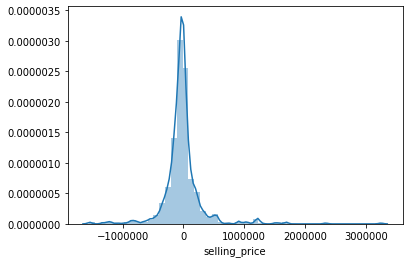

In [40]:
sns.distplot(y_test-predictions)

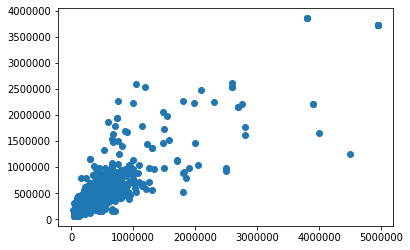

In [42]:
plt.scatter(y_test,predictions)

Now,we can see from the distplot and scatter plot that the our model is performing well.Its not completely accurate but with a very basic random forest method we have achieved good results.